In [0]:
# Import MINST data 
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
mnist = mnist_data.read_data_sets("data", one_hot = True) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


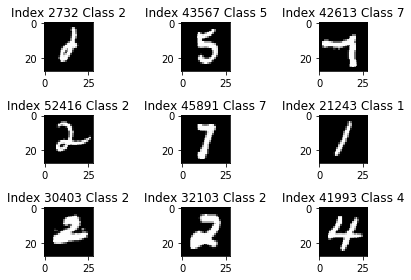

In [0]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# random check with nine training examples
np.random.seed(0);
indices = list(np.random.randint(mnist.train.labels.shape[0],size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(mnist.train.images[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], np.where(mnist.train.labels[indices[i]] == 1)[0][0]))
    plt.tight_layout()

![alt text](https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif)

In [0]:
import tensorflow as tf
import progressbar
from time import sleep


def mlp(learning_rate, training_epochs, batch_size):
  # Progress
  bar = progressbar.ProgressBar(maxval=training_epochs, \
    widgets=[progressbar.Percentage()])
  # Network Parameters 
  n_hidden_1 = 256
  n_hidden_2 = 256 
  n_input = 784 # MNIST data input (img shape: 28*28) 
  n_classes = 10 # MNIST total classes (0-9 digits) 

  x = tf.placeholder(tf.float32, [None, n_input]) 
  y = tf.placeholder(tf.float32, [None, n_classes]) 

  w1 = tf.Variable(tf.random_normal([n_input, n_hidden_1], seed=1997)) 
  b1 = tf.Variable(tf.random_normal([n_hidden_1], seed=1997)) 
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w1), b1)) 

  w2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], seed=1997)) 
  b2 = tf.Variable(tf.random_normal([n_hidden_2], seed=1997)) 
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2)) 

  w_out = tf.Variable(tf.random_normal([n_hidden_2, n_classes], seed=1997)) 
  b_out = tf.Variable(tf.random_normal([n_classes], seed=1997)) 
  output_layer = tf.matmul(layer_2, w_out) + b_out


  loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = output_layer, labels = y)) 
  # Adam: Adaptive Momentum estimation
  optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss) 

  init = tf.global_variables_initializer()

  # for plot 
  avg_set = [] 
  epoch_set = []


  # Launch the graph 
  with tf.Session() as sess: 
    sess.run(init)
    
    bar.start()

    for epoch in range(training_epochs): 
        bar.update(epoch+1)
        avg_loss = 0. 
        total_batch = int(mnist.train.num_examples / batch_size) 
        
        for i in range(total_batch): 
          batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
          sess.run(optimizer, feed_dict = {x: batch_xs, y: batch_ys}) 
          avg_loss += sess.run(loss, feed_dict = {x: batch_xs, y: batch_ys}) / total_batch

        if epoch % 1 == 0:
          print("Epoch:", '%02d' % (epoch+1), "loss={:.9f}".format(avg_loss))

        avg_set.append(avg_loss) 
        epoch_set.append(epoch + 1)

    bar.finish() 
    
    plt.plot(epoch_set, avg_set, 'o', label = 'MLP Training phase') 
    plt.ylabel('Average Loss') 
    plt.xlabel('Epoch') 
    plt.legend() 
    plt.show() 

    # Test model
    correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1)) 

    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) 
    
    # Calculate accuracy for Test Set
    print("\n\nModel Accuracy (Test Set):", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

    # Calculate accuracy for Train Set
    print("Model Accuracy (Train Set):", accuracy.eval({x: mnist.train.images, y: mnist.train.labels}))

  5%                                                                           

Epoch: 01 loss=0.267380818


  7%                                                                           

Epoch: 02 loss=0.098635666


 10%                                                                           

Epoch: 03 loss=0.070475413


 12%                                                                           

Epoch: 04 loss=0.055311181


 15%                                                                           

Epoch: 05 loss=0.045520177


 17%                                                                           

Epoch: 06 loss=0.038313376


 20%                                                                           

Epoch: 07 loss=0.032664180


 22%                                                                           

Epoch: 08 loss=0.027993672


 25%                                                                           

Epoch: 09 loss=0.024135509


 27%                                                                           

Epoch: 10 loss=0.020901084


 30%                                                                           

Epoch: 11 loss=0.018055119


 32%                                                                           

Epoch: 12 loss=0.015597407


 35%                                                                           

Epoch: 13 loss=0.013483260


 37%                                                                           

Epoch: 14 loss=0.011712888


 40%                                                                           

Epoch: 15 loss=0.010066133


 42%                                                                           

Epoch: 16 loss=0.008710040


 45%                                                                           

Epoch: 17 loss=0.007453676


 47%                                                                           

Epoch: 18 loss=0.006414114


 50%                                                                           

Epoch: 19 loss=0.005477733


 52%                                                                           

Epoch: 20 loss=0.004702858


 55%                                                                           

Epoch: 21 loss=0.004008714


 57%                                                                           

Epoch: 22 loss=0.003400026


 60%                                                                           

Epoch: 23 loss=0.002883876


 62%                                                                           

Epoch: 24 loss=0.002422268


 65%                                                                           

Epoch: 25 loss=0.002042620


 67%                                                                           

Epoch: 26 loss=0.001722448


 70%                                                                           

Epoch: 27 loss=0.001442733


 72%                                                                           

Epoch: 28 loss=0.001213426


 75%                                                                           

Epoch: 29 loss=0.001009885


 77%                                                                           

Epoch: 30 loss=0.000855763


 80%                                                                           

Epoch: 31 loss=0.000713860


 82%                                                                           

Epoch: 32 loss=0.000587562


 85%                                                                           

Epoch: 33 loss=0.000489737


 87%                                                                           

Epoch: 34 loss=0.000421588


 90%                                                                           

Epoch: 35 loss=0.000345543


 92%                                                                           

Epoch: 36 loss=0.000284183


 95%                                                                           

Epoch: 37 loss=0.000239151


 97%                                                                           

Epoch: 38 loss=0.000202544


100%                                                                           

Epoch: 39 loss=0.000166395


100%                                                                           


Epoch: 40 loss=0.000137213


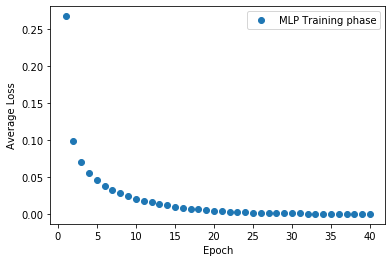



Model Accuracy (Test Set): 0.9631
Model Accuracy (Train Set): 1.0


In [0]:
  mlp(learning_rate=0.001, training_epochs=40, batch_size=100)


Testing with Learning Rate:  0.1


 40%                                                                           

Epoch: 01 loss=0.213917246


 60%                                                                           

Epoch: 02 loss=0.127455706


 80%                                                                           

Epoch: 03 loss=0.124878308


100%                                                                           

Epoch: 04 loss=0.128268482


100%                                                                           


Epoch: 05 loss=0.125544981


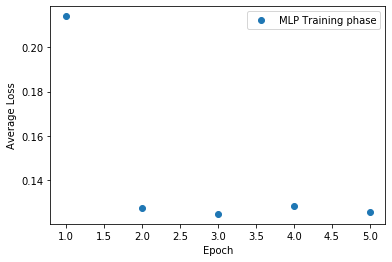



Model Accuracy (Test Set): 0.8669
Model Accuracy (Train Set): 0.86367273

---------------------------------------------

Testing with Learning Rate:  0.01


 40%                                                                           

Epoch: 01 loss=0.095347728


 60%                                                                           

Epoch: 02 loss=0.033218686


 80%                                                                           

Epoch: 03 loss=0.023487813


100%                                                                           

Epoch: 04 loss=0.018200478


100%                                                                           


Epoch: 05 loss=0.014717326


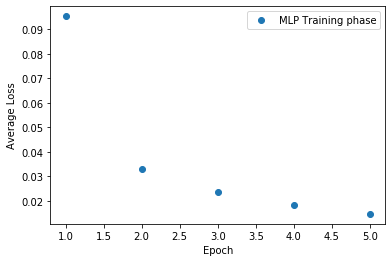



Model Accuracy (Test Set): 0.9616
Model Accuracy (Train Set): 0.9791091

---------------------------------------------

Testing with Learning Rate:  0.015


 40%                                                                           

Epoch: 01 loss=0.079693834


 60%                                                                           

Epoch: 02 loss=0.028371580


 80%                                                                           

Epoch: 03 loss=0.021150810


100%                                                                           

Epoch: 04 loss=0.018468124


100%                                                                           


Epoch: 05 loss=0.016159548


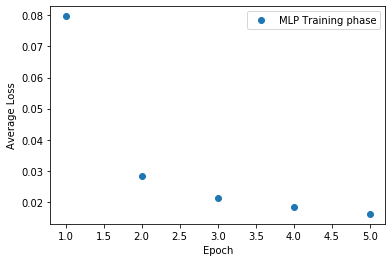



Model Accuracy (Test Set): 0.9613
Model Accuracy (Train Set): 0.97263634

---------------------------------------------

Testing with Learning Rate:  0.014


 40%                                                                           

Epoch: 01 loss=0.093054201


 60%                                                                           

Epoch: 02 loss=0.030464106


 80%                                                                           

Epoch: 03 loss=0.022559874


100%                                                                           

Epoch: 04 loss=0.018450672


100%                                                                           


Epoch: 05 loss=0.015820288


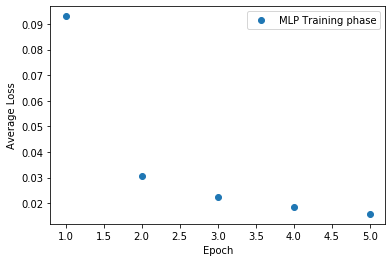



Model Accuracy (Test Set): 0.9548
Model Accuracy (Train Set): 0.9682

---------------------------------------------

Testing with Learning Rate:  0.016


 40%                                                                           

Epoch: 01 loss=0.081499057


 60%                                                                           

Epoch: 02 loss=0.028668355


 80%                                                                           

Epoch: 03 loss=0.022284582


100%                                                                           

Epoch: 04 loss=0.018465920


100%                                                                           


Epoch: 05 loss=0.016065603


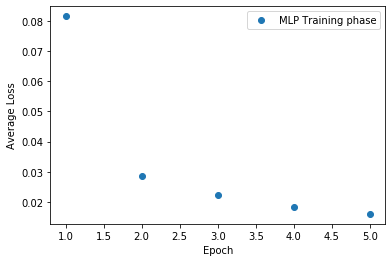



Model Accuracy (Test Set): 0.9626
Model Accuracy (Train Set): 0.9737091

---------------------------------------------

Testing with Learning Rate:  0.05


 40%                                                                           

Epoch: 01 loss=0.113200932


 60%                                                                           

Epoch: 02 loss=0.046605686


 80%                                                                           

Epoch: 03 loss=0.049582632


100%                                                                           

Epoch: 04 loss=0.047419764


100%                                                                           


Epoch: 05 loss=0.049558306


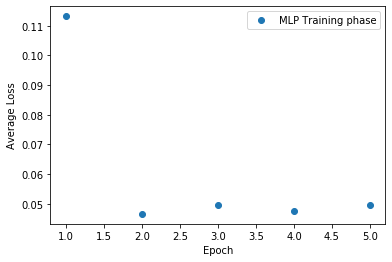



Model Accuracy (Test Set): 0.921
Model Accuracy (Train Set): 0.9219818

---------------------------------------------

Testing with Learning Rate:  0.005


KeyboardInterrupt: ignored

In [0]:
"""lrs = [0.1, 0.01, 0.015, 0.016 , 0.05, 0.005]
for lr in lrs:
  print("Testing with Learning Rate: ", lr)
  mlp(learning_rate=lr, training_epochs=5, batch_size=100)
  print("\n---------------------------------------------\n")"""